#### p-value (유의확률) 
- "귀무 가설이 참일 때" 표본의 결과와 같거나, 더 극단적인 값을 얻을 확률

#### 유의수준 (α)
- 귀무 가설을 기각하는 기준 <br>

귀무가설이 유의하지 않음 -> 대립 가설 채택
귀무가설이 유의 -> 대립 가설 기각


## 1. T-test

- 검정통계량이 귀무가설 하에서, t-분포를 따르는 통계적 가설 검정 방법
- 어느 특정 집단의 평균의 값을 추정하거나, 차이를 검정할 때 사용할 수 있다
- 통계적 분석 개념에는 분산을 사용
- Y(종속변수) : 연속형 변수 / X(독립변수) : 범주형 변수 <br>


#### 정규성 검증
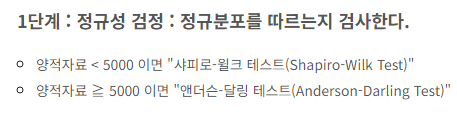

##### 일표본 T-test
- 단일 모집단에서 연속형 변수의 평균값과 특정 기준값을 비교
- 모집단이 정규분포를 이룬다는 가정이 필요
```python
scipy.stats.shapiro(x)
# H0 : 정규성을 가짐
# H1 : 정규성을 가지지 않음
```

![KakaoTalk_20231120_122631131_02.jpg](attachment:KakaoTalk_20231120_122631131_02.jpg )
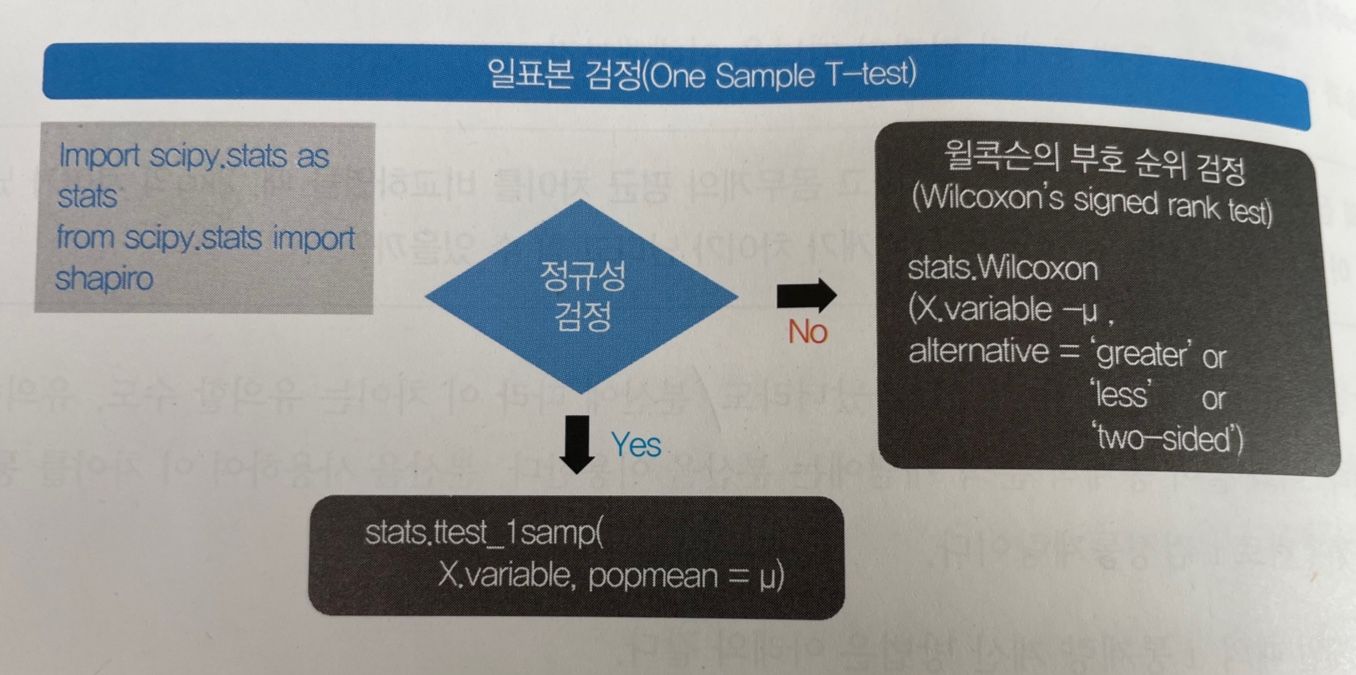

##### 단계 
```python
1) 가설 수립
    - H0 : 모평균의 값은 N이다.
    - H1 : 모평균의 값은 N이 아니다.
2) 유의 수준 설정
    - 기본적으로 0.05
3) 검정통계량 값 및 p-value 계산
4) 귀무가설의 기각여부 판단 및 해석
```

In [2]:
import pandas as pd
cats = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')
cats[:3]
# Bwt : 몸무게, Hwt : 길이

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5


In [4]:
# 고양이들의 평균 몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고, 결과 해석 (유의수준 = 0.05)
import scipy.stats as stats
from scipy.stats import shapiro

mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

```python
ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)
# p-value가 유의수준보다 작으므로 '데이터가 정규분포를 따른다'라는 귀무가설을 기각
# 정규 분포를 따를 경우 - stats.ttest_1sampe(cats.Bwt, popmean=mu) 
# 정규 분포를 따르지 않을 경우 - wilcoxon test로 t-test 진행
```


In [6]:
stats.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.025245202948140935)

```python
WilcoxonResult(statistic=3573.0, pvalue=0.025245202948140935)
# pvalue가 유의수준 보다 작기 때문에 '2.6kg이다' 라는 귀무가설을 기각할 수 있음
# 즉, "유의수준 0.05하에 고양이의 평균 몸무게는 2.6kg이라고 할 수 없다"
```

Text(0.5, 0, 'Bwt')

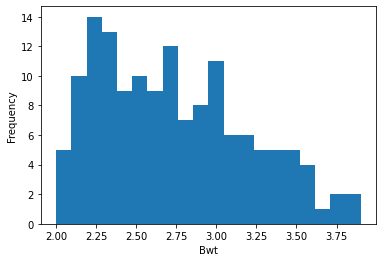

In [12]:
import matplotlib.pyplot as plt

cats['Bwt'].plot.hist(bins=20)
plt.xlabel('Bwt')
# 시각화를 통해 보더라도 정규성을 띄지 않음을 알 수 있다

##### 대응표본 T-test

- 단일 모집단에 대해 어떠한 처리를 가했을 경우, 처리 전, 후에 따른 평균의 차이를 비교할 때 사용
- 같은 집단에 대해 두 번의 측정을 하기 때문에 등분산성을 만족함
- 모집단의 관측값이 정규성을 만족해야 함

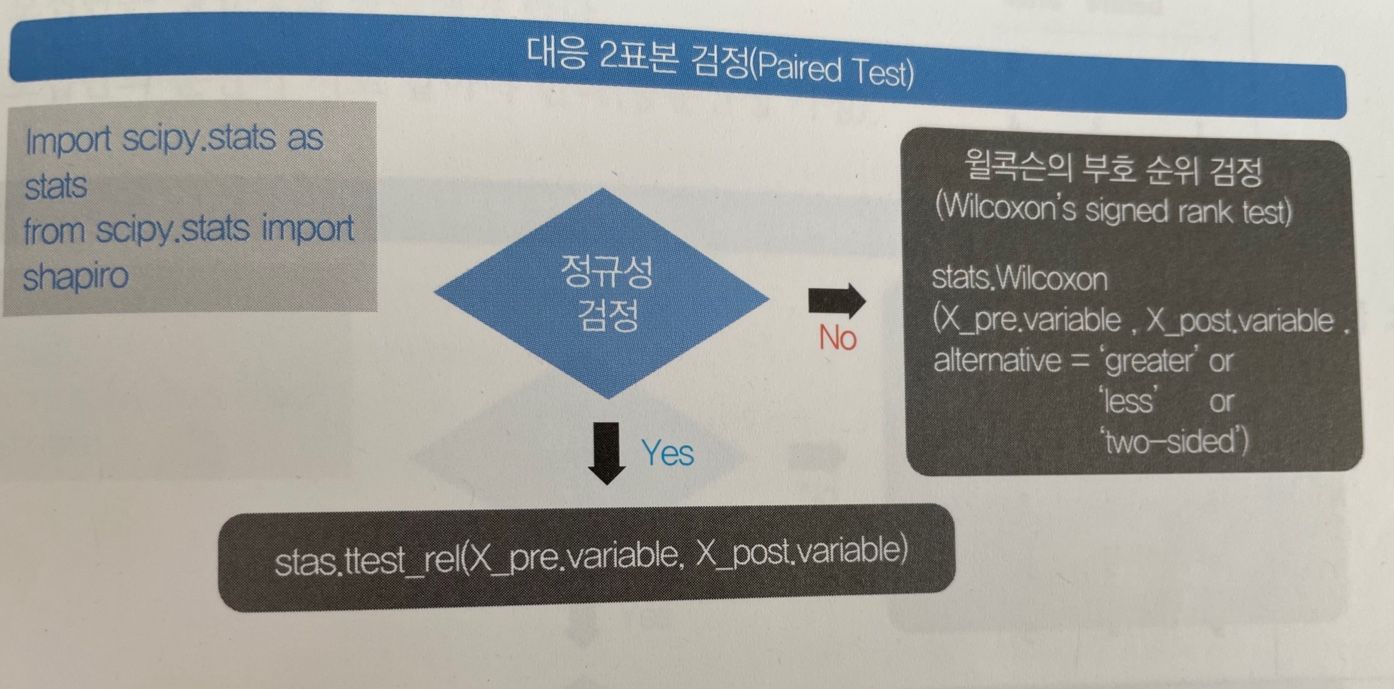

In [14]:
## 10명의 환자 대상 수면영양제 복용 전, 후의 수면 시간 측정, 영양제의 효과가 있는지를 판단
# H0 : 복용 후, 전보다 수면 시간이 늘지않았다
# H1 : 복용 후, 전보다 수면 시간이 늘었다

data = {'before' : [7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
       'after' : [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(data)

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [16]:
# 정규성 검정
import scipy.stats as stats
from scipy.stats import shapiro

shapiro(data) # 정규성 만족 

ShapiroResult(statistic=0.9596133232116699, pvalue=0.5361530184745789)

In [17]:
# 대응표본 t-test
stats.ttest_rel(data['after'], data['before'], alternative='greater')
# greater : 복용 후의 값이 복용 전보다 크다는 것을 가정함
# p-value < 0.05 이므로 귀무가설(차이가 없다) 기각 즉, "수면제 복용 후, 수면시간이 늘었다"

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082765, df=9)

##### 독립표본 T-test

- 두 개의 독립된 모집단의 평균을 비교할 때 사용
- 즉 모집단, 모수, 표본이 두 개씩 존재 (등분산성 가정이 필요)
- 두 모집단은 정규성을 만족해야 한다

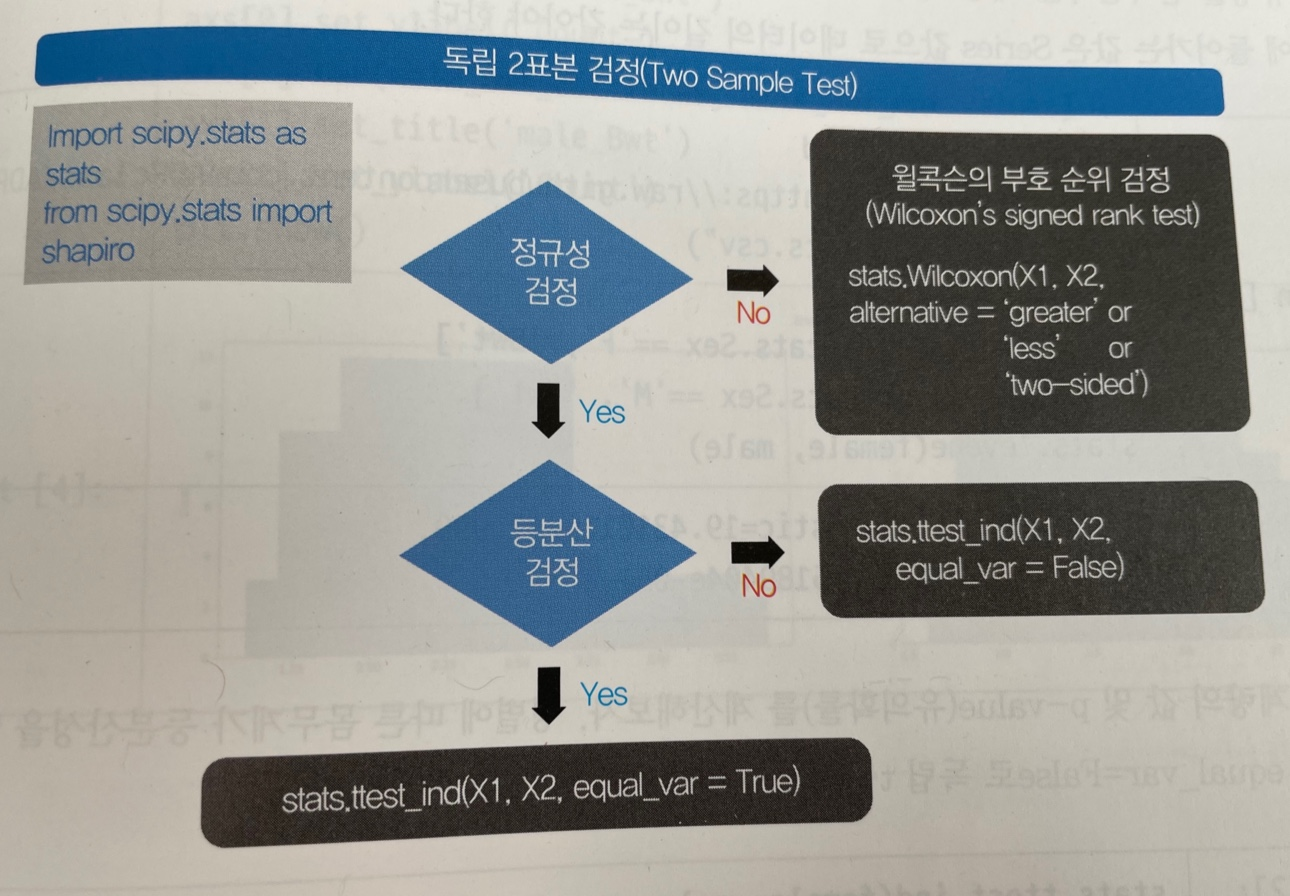

In [24]:
## 수컷 고양이와, 암컷 고양이의 몸무게 차이 비교
# H0 : 수컷, 암컷의 몸무게 차이는 없다
# H1 : 수컷, 암컷의 몸무게 차이는 있다
import scipy.stats as stats
from scipy.stats import shapiro 

cats = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')
female = cats[cats['Sex'] == 'F']['Bwt']
male = cats[cats['Sex'] == 'M']['Bwt']
female.shape, male.shape

((47,), (97,))

In [22]:
# # 정규성 검정
# # H0 : 정규성을 만족한다 
# print(shapiro(female)) # 정규성 만족하지 않음
# print(shapiro(male)) # 정규성 만족

ShapiroResult(statistic=0.8909614682197571, pvalue=0.00037543251528404653)
ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)


In [25]:
# 정규성을 만족한다고 가정하고, 등분산성 검정 수행
# H0 : 등분산성 만족
# H1 : 등분산성 불만족

stats.levene(female, male)
# pvalue < 0.05 이므로 H1채택

LeveneResult(statistic=19.43101190877999, pvalue=2.043528525518961e-05)

In [26]:
stats.ttest_ind(female, male, equal_var=False)
# pvalue < 0.05 이므로 H1 채택 즉 "수컷, 암컷 고양이의 몸무게 차이는 있다"

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

Text(0.5, 1.0, 'Male Cat')

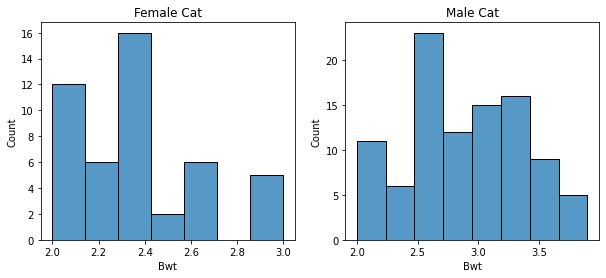

In [35]:
# 시각화로 확인
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.histplot(data=female, ax=ax[0])
sns.histplot(data=male, ax=ax[1])
ax[0].set_title('Female Cat')
ax[1].set_title('Male Cat')

# 2. 분산분석 (ANOVA)
- 두 개 이상의 다수 집단 간 평균을 비교하는 방법
- Y(종속변수) : 연속형 변수, X(독립변수) : 범주형 변수
- 두 개 이상의 집단에서 그룹 간 평균 차이를 그룹 내 변동에 비교하여 분석하는 방법
- 그룹 내의 분산차보다 그룹 간 분산차가 더 크다면 유의하다고 할 수 있다

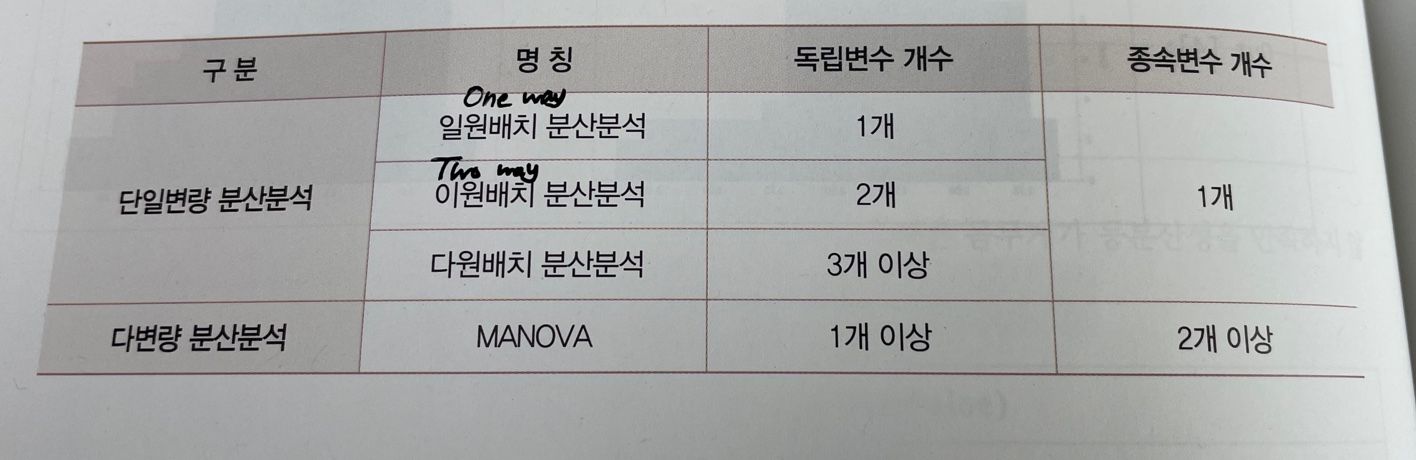

##### 일원배치 분산분석 (Oneway ANOVA)

- Y(종속변수)에 대한 하나의 X(범주형 변수)의 영향을 알아보기 위해 사용하는 검증 방법
- 모집단의 수에는 제한 없으며, 각 표본의 수는 같지 않아도 된다
- F 통계량 사용
    - 평균의 차이 계산이 아닌, 분산의 비율값
    - 집단 내 분산보다 집단 간 분산이 크다면 F 값은 커지며, 귀무가설을 기각할 확률이 높아짐
- 가정 
    - 집단의 측정치는 서로 독립이며, 정규분포를 따름
    - 집단의 분산은 같다 (등분산 가정)
- 가설
    - H0 : 집단 간 모평균에는 차이가 없다 (같다)
    - H1 : 집단 간 모평균이 모두 같다고 할 수 없다
- 사후검정
    - 적어도, 한 집단에서 평균의 차이가 있음이 통계적으로 증명이 된 경우, 어떤 집단들에 대해 평균의 차이가 존재하는지 알아보기 위한 분석
    - 던칸의 MRT, vltudml LSD, 튜키의 HSD방법 등이 있다

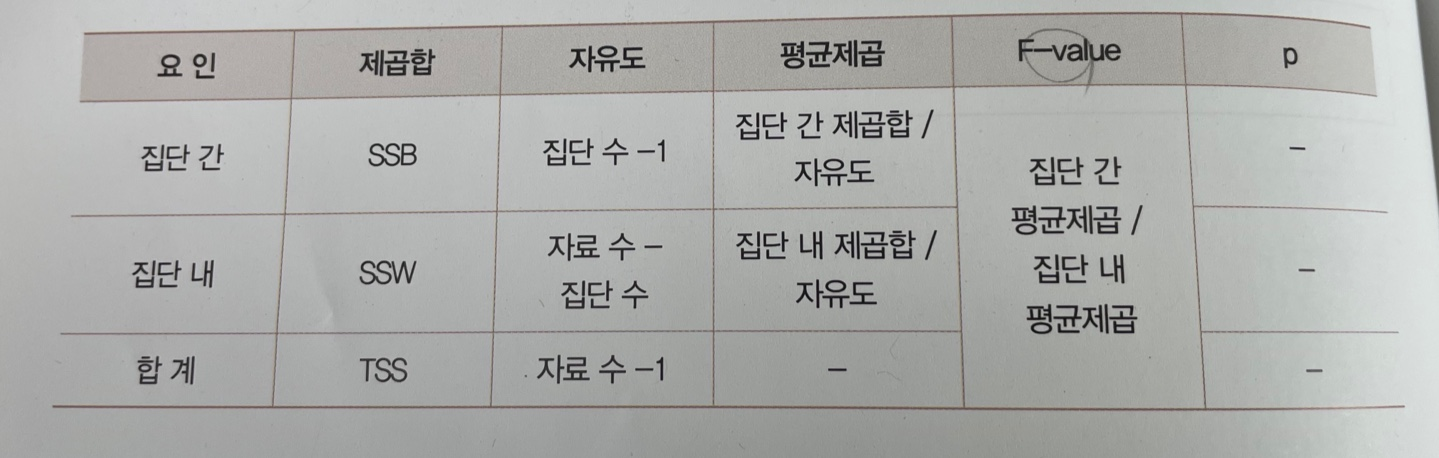

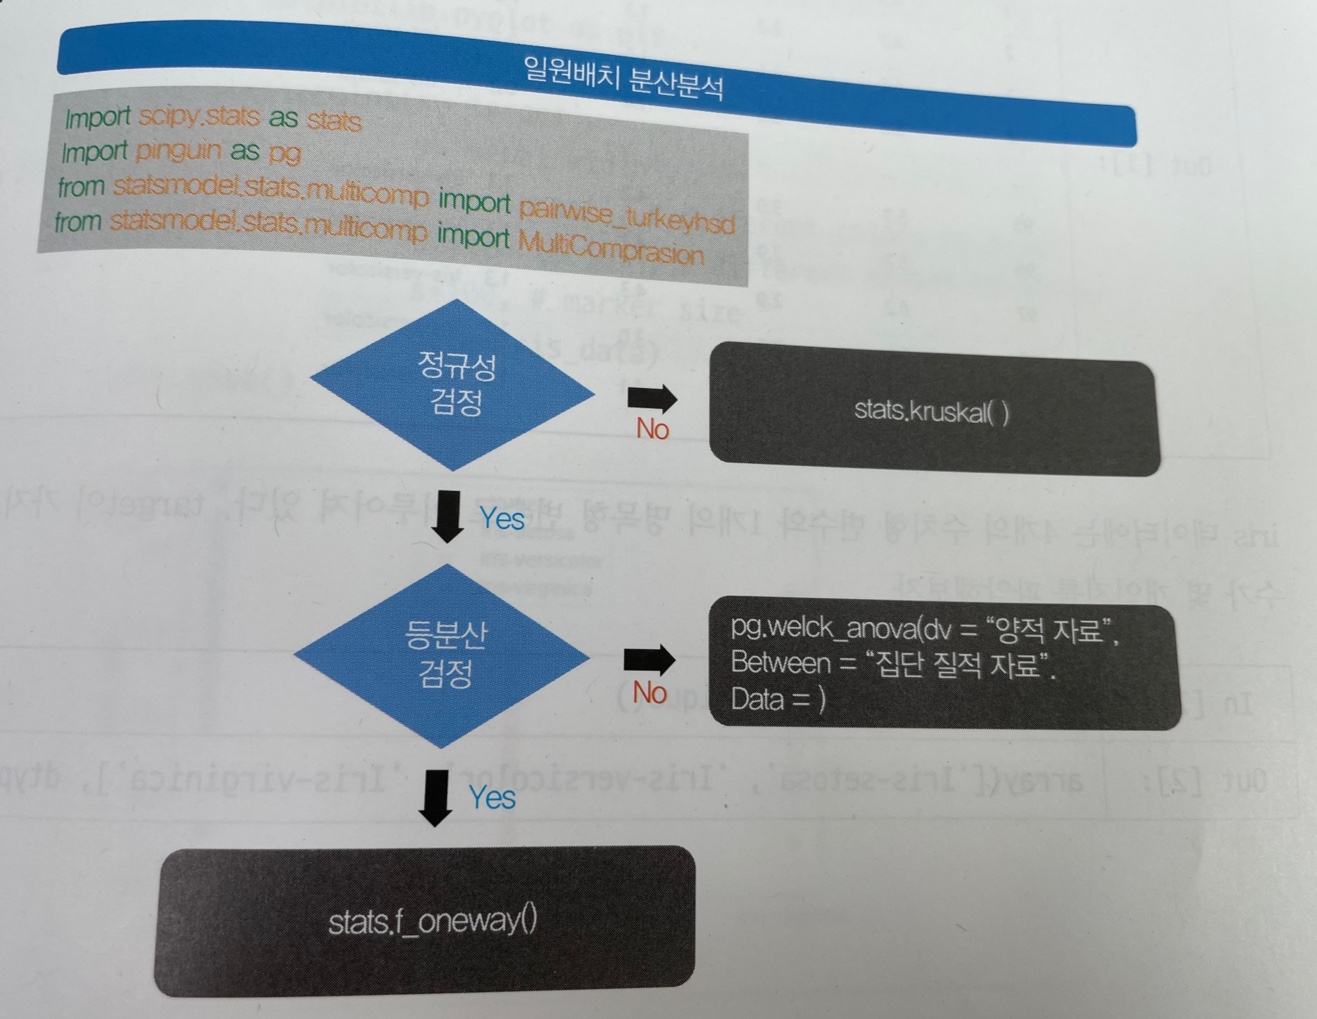

In [42]:
import scipy.stats as stats
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
iris[:3]

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [44]:
iris['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
setosa = iris[iris['target'] == 'Iris-setosa']['sepal width']
versicolor = iris[iris['target'] == 'Iris-setosa']['sepal width']
virginica = iris[iris['target'] == 'Iris-virginica']['sepal width']

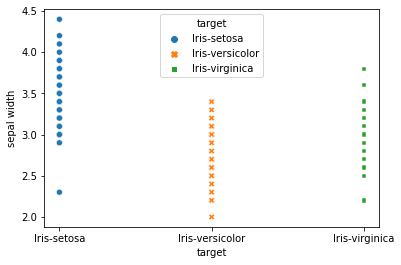

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=iris, x='target', y='sepal width', hue='target', style='target')
plt.show()
# sepal width의 평균이 target 별로 차이가 있는 것으로 보임

In [48]:
# H0 : 세 가지 종에 대한 sepal width의 평균이 차이가 없다
# H1 : 세 가지 종에 대한 sepal width의 평균이 차이가 있다

# 정규성 검정
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))
# 세 가지 모두 정규성을 만족 (하나라도 만족하지 않다면 kruskal 고려)

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


In [49]:
# 등분산 검정
stats.levene(setosa, versicolor, virginica)
# 등분산 만족

LeveneResult(statistic=0.6737485378720955, pvalue=0.5113611061145822)

In [50]:
stats.f_oneway(setosa, versicolor, virginica)
# pvalue < 0.05 -> 대립가설 채택 : 그룹 간 평균에 차이가 존재

F_onewayResult(statistic=24.994214388474315, pvalue=4.533477499526432e-10)

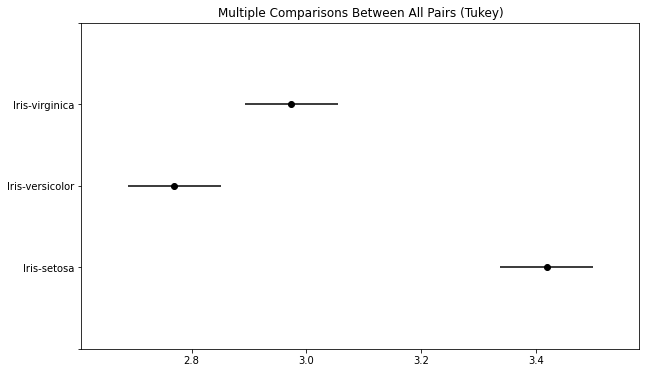

In [53]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()

In [55]:
tukeyhsd.summary()
# 세 조합 모두 p-adj(p-value)가 0.05보다 작으므로 각각의 귀무가설 기각 (=차이가 있음)

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


##### 이원배치 분산분석 (Twoway ANOVA)

- 하나의 Y(종속변수)에 대한 두 개의 X(범주형 독립변수)의 영향을 알아보기 위해 사용되는 검증 방법
- 두 독립변수 사이의 상관관계가 있는지를 살펴보는 교호작용에 대한 검증이 반드시 진행되어야 함
    - 교호작용 : 두 범주들의 조합으로 인해 반응변수에 미치는 특별한 영향
- F 검정 통계량 사용
- 가정
    - 집단 내 측정치는 서로 독립적이며, 정규분포를 따름
    - 집단 들의 분산은 같다 (등분산성)
- 가설
    - H0 : a, b의 교호작용이 없다
    - H0 : a에 따른 y값에는 차이가 없다
    - H0 : b에 따른 y값에는 차이가 없다
    - H1 : a, b의 교호작용이 있다
    - H1 : a에 따른 y값에는 차이가 있다
    - H1 : b에 따른 y값에는 차이가 있다
- 사후검정
    - 적어도, 한 집단에서 평균의 차이가 있음이 통계적으로 증명이 된 경우, 어떤 집단들에 대해 평균의 차이가 존재하는지 알아보기 위한 분석
    - 던칸의 MRT, vltudml LSD, 튜키의 HSD방법 등이 있다

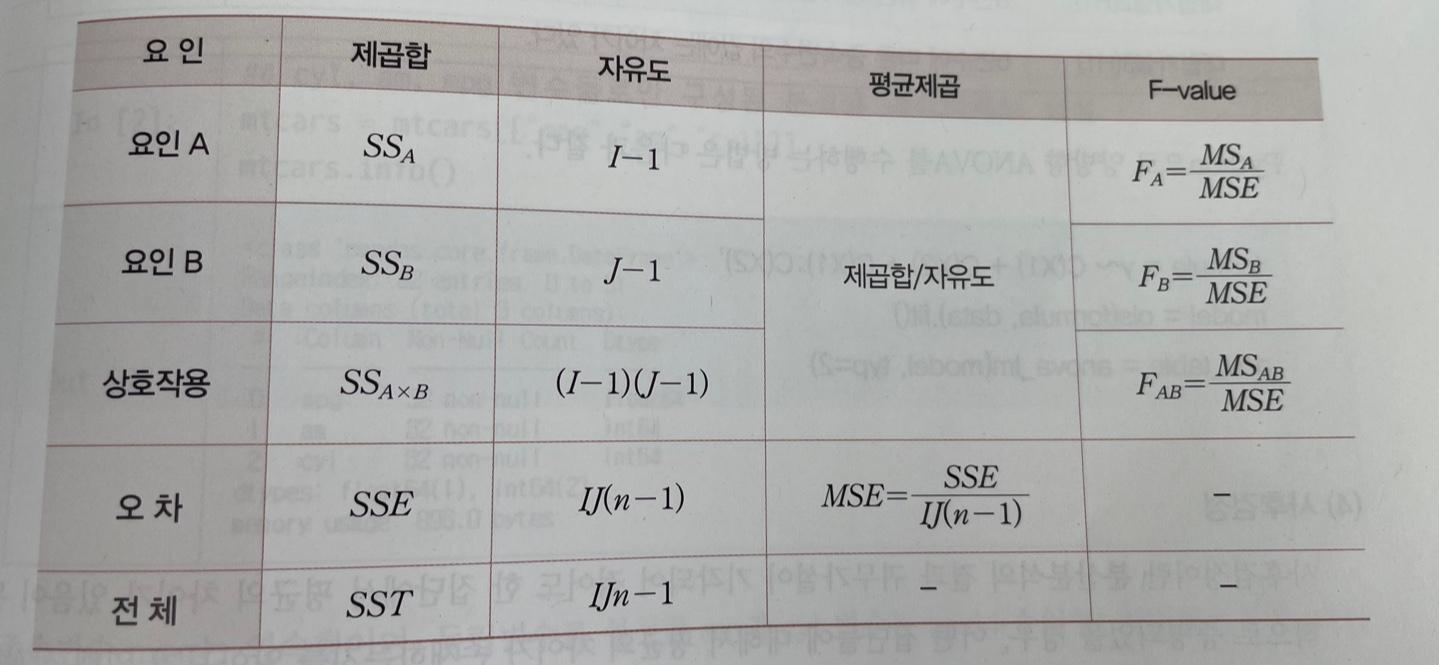

In [57]:
mtcars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv')
mtcars = mtcars[['mpg', 'am', 'cyl']]
mtcars[:3]
# mpg : 주행거리, am : 변속기 종류, cyl : 실린더 개수

,mpg,am,cyl
0,21.0,1,6
1,21.0,1,6
2,22.8,1,4


In [61]:
## 변속기 종류, 실린더 개수에 따라 주행거리 평균에 유의미한 차이가 존재하는지 분석

# 분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table
# cyl, am의 상호작용 : PR(>F)(p-value)는 0.05보다 크므로, 귀무가설 기각X (= 상호작용이 없다)
# cyl : p-value가 0.05보다 작으므로, 귀무가설 기각 (= 실린더 개수에 따른 주행거리 간 유의미한 차이 존재)
# am : p-value가 0.05보다 크므로, 귀무가설 기각X (=변속기 종류에 따른 주행거리 간 유의미한 차이 X)

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


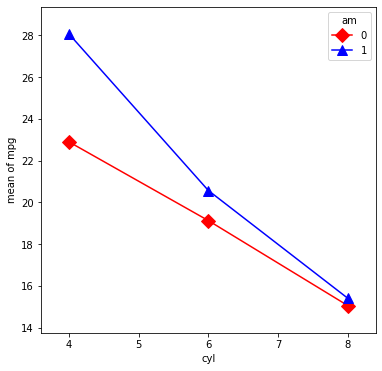

In [62]:
# 교호작용은 그래프를 보고 해석하는것이 직관적
# 일반적으로 두 선이 교차하고 있을 경우, x축의 독립변수와 y간에는 상호작용이 존재한다고 할 수 있다
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)

# 3. 교차분석 (카이제곱 검정)

- X(독립변수)가 범주형 변수인 경우에 사용하는 통계적 기법
- 각 범주에 따른 결과변수의 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우, 두 변수가 상관이 있는지 검정
- 교차표를 통해 각 셀의 관찰빈도와 기대빈도 간의 차이를 검증하는 방법
    - 관찰빈도 : 자료로부터 얻은 빈도분포
    - 기대빈도 : 두 변수가 독립일 때, 이론적으로 기대할 수 있는 빈도분포
- 각 범주의 기대빈도는 5 이상이어야 한다
- 검정의 목적에 따라 [ 적합성 검정, 독립성 검정, 동질성 검정 ] 세 가지로 나뉜다

#### 적합성 검정

- 각 범주에 따른 관찰빈도가 이론적으로 기대하는 분포인 기대빈도를 따르는지를 검정
    - ex) 주사위를 굴렸을 때, 각 주사위의 값이 1/6의 확률이 맞는지를 검정

```python
scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
# f_obs : 관찰빈도로 pd.value_counts() 결과 값을 입력
# f_exp : 각 카테고리의 기대 빈도
# ddof : p-value에 대한 자유도를 조정, 자유도 : k-1-ddof, k(범주의 수)
```

In [63]:
## 성별에 따른 생존 여부 적합성 검정

# H0 : 타이타닉호 생존자 중 남/여 비율이 5 : 5이다
# H1 : 타이타닉호 생존자 중 남/여 비율이 5 : 5이 아니다
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv')
df[:3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton


In [66]:
survived = df[df['survived']==1]
table = survived['sex'].value_counts()
table

female    233
male      109
Name: sex, dtype: int64

In [68]:
import scipy.stats as stats

chi = stats.chisquare(table, f_exp=[171, 171]) # 5 : 5라 가정
chi
# pvalue < 0.05 대립가설 채택 (= 5 : 5가 아니다)

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.011967257447723e-11)

#### 독립성 검정
- 모집단이 두 개의 변수 A, B에 의해 범주화되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정
    -  ex) 환자의 비만유무, 대사성질환의 유무가 주어졌을 때, 비만에 따른 질환 비율에 차이가 존재하는지
    
```python
scipy.stats.chi2_contingency( (observed, correction=True, lambda_=None) )
# observed : 관찰빈도, pd.crosstab을 입력
# chi2 : 카이제곱 통계량 값
# p : p-value
# dof : 자유도
# expected : 테이블의 합계를 기반으로 한 기대빈도
```

In [69]:
## 좌석 등급과 생존 여부의 독립성 검정
# H0 : 두 변수는 독립이다
# H1 : 두 변수는 독립이 아니다

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv')

table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [71]:
import scipy.stats as stats

chi, p, df, expect = stats.chi2_contingency(table)
print('Statistic :', chi)
print('p-value :', p)
print('df :',df)
print('expect :\n', expect)
# 좌석 등급과 생존여부는 독립이 아니다

Statistic : 102.88898875696056
p-value : 4.549251711298793e-23
df : 2
expect :
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


#### 동질성 검정
- 모집단이 임의의 변수에 따라 범주화되었을 때, 부분 모집단의 분포가 서로 동일한지를 검정
- 독립성 검정과 계산법, 검정 방법이 같음
```python
scipy.stats.chi2_contingency( (observed, correction=True, lambda_=None) )
```

In [73]:
## 좌석 등급과 생존 여부 간의 동질성 검정
# H0 : 좌석 등급의 분포는 생존 여부에 관계없이 동일
# H1 : 좌석 등급의 분포는 생존 여부에 관계없이 동일하지 않음
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/titanic.csv')

table = pd.crosstab(df['class'], df['survived'])
chi, p, df, expect = stats.chi2_contingency(table)
print('Statistic :', chi)
print('p-value :', p)
print('df :',df)
print('expect :\n', expect)
# 좌석 등급의 분포는 생존 여부와 관계없이 동일하지 않다

Statistic : 102.88898875696056
p-value : 4.549251711298793e-23
df : 2
expect :
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
